## Imports

In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

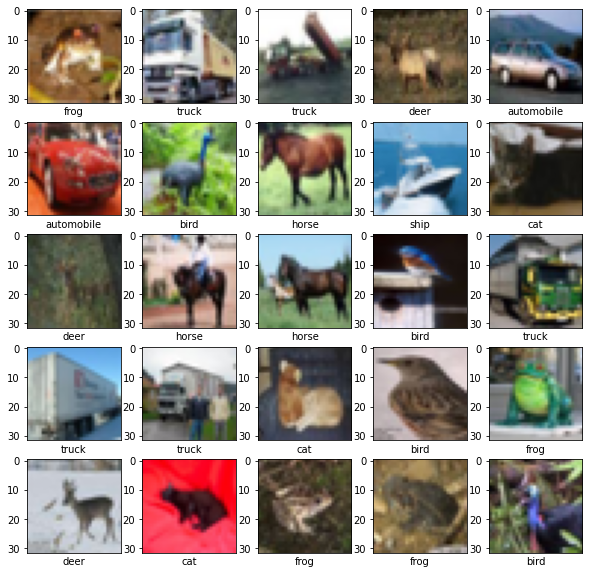

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Autoencoder model

In [4]:
#input
img_in = layers.Input( shape=(32, 32, 3) )

#Encoding layer
encoding = layers.Flatten()(img_in)
encoding = layers.Dense(400)(encoding)

#Decoding Layer
decoding = layers.Dense(32*32*3)(encoding)
decoding = layers.Reshape([32, 32, 3])(decoding)

autoencoder = tf.keras.Model(inputs=img_in, outputs=decoding)
encoder = tf.keras.Model(inputs=img_in, outputs=encoding)

In [5]:
autoencoder.compile( loss=tf.keras.losses.MSE, optimizer=tf.keras.optimizers.Adam())

In [14]:
autoencoder.fit(x = train_images, y = train_images, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0379
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.0030
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0026
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0025
Epoch 5/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.0026
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0383
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0032
Epoch 8/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0025
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.0021
Epoch 10/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0020


# Testing the autoencoder

In [12]:
def fixImageNumbers(imgArr):
    for x in range(0, len(imgArr)):
            for y in range(0, len(imgArr[x])):
                for j in range(0, len(imgArr[x][y])):
                    if imgArr[x][y][j] > 1:
                        imgArr[x][y][j] = 1
                    elif imgArr[x][y][j] < 0:
                        imgArr[x][y][j] = 0
    return imgArr

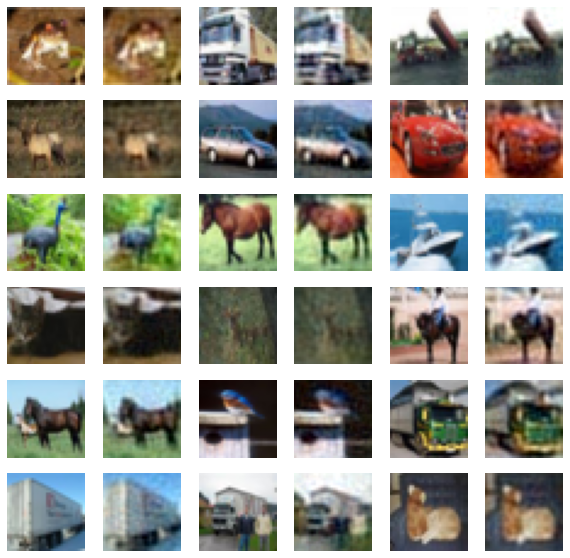

In [15]:
xpred = autoencoder.predict(x=train_images[:25])
fig,axs = plt.subplots(6,6, figsize=(10,10))
for i, ax in enumerate(axs.flat):
    if (i % 2 == 0):
        ax.imshow(train_images[int(i/2)].reshape(32,32,3))
    else:
        img = fixImageNumbers(xpred[int(i/2)])
        ax.imshow(img.reshape(32,32,3))
    ax.axis('off')

In [ ]:
#